In [1]:
%matplotlib notebook

#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc


In [2]:
#Read the csv datafile
mort_data=pd.read_csv('Cleaned-gun-deaths.csv')
mort_df=pd.DataFrame(mort_data)
mort_df.head()

,Unnamed: 0,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
1,1,Residents,January,F,19,15 - 24,Other,S,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide
2,2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,suicide
3,3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,2015,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,Assault (homicide)
4,4,Residents,January,F,40,35 - 44,Other,D,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,suicide


In [3]:
#check the yearly mortality data
mort_df.describe()
df_y=mort_df['Data_Year'].value_counts()

df_y[2017]

39927

<IPython.core.display.Javascript object>


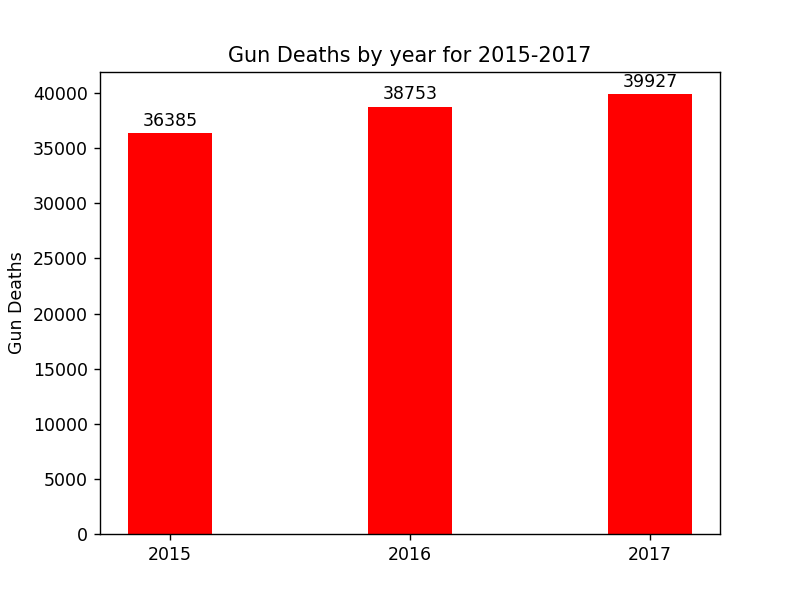

In [12]:
yearly_death_cnt=[df_y[2015],df_y[2016],df_y[2017]]

year=[2015,2016,2017]

fig, ax = plt.subplots()

#define function to label the bars with counts
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
rect=ax.bar(year, yearly_death_cnt, color='r', width=0.35 , align="center")
autolabel(rect)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gun Deaths')
ax.set_title('Gun Deaths by year for 2015-2017')
ax.set_xticks(year)

plt.show()

plt.savefig('Bhumika_plot_images/Gun_Deaths_by_Year.png')

<IPython.core.display.Javascript object>


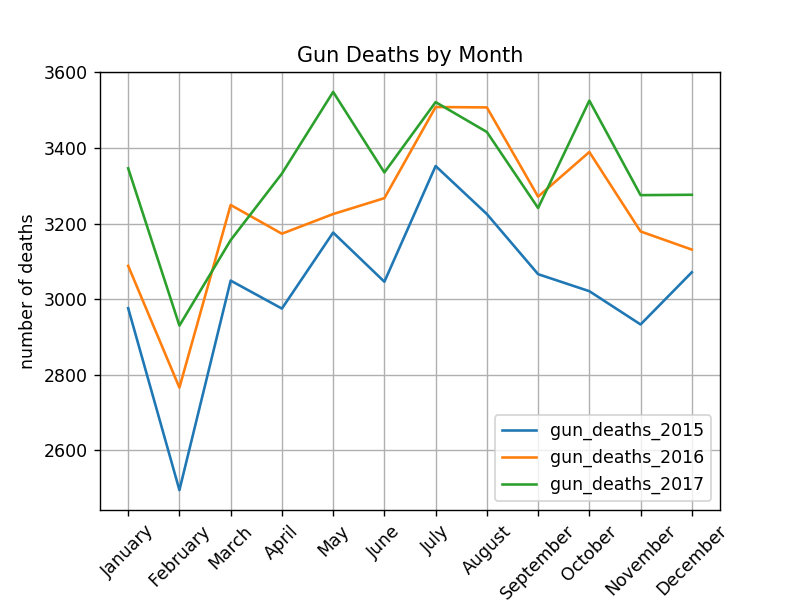

In [11]:
#Plotting the yearly treand for gun deaths for each year to see if there is any particular time of the day when these 
#deaths increase

fig, ax2 = plt.subplots()

group_data=mort_df.groupby(['Data_Year','Month_Of_Death'])
death_manner_y_cnts=group_data['Data_Year'].count()
death_manner_y_cnts

death_manner_y_cnts
months=mort_df['Month_Of_Death'].unique()
months

#creating a list of death counts for each month of the year
deaths_2015=[death_manner_y_cnts[4],death_manner_y_cnts[3],death_manner_y_cnts[7],death_manner_y_cnts[0],death_manner_y_cnts[8],death_manner_y_cnts[6],death_manner_y_cnts[5],death_manner_y_cnts[1],death_manner_y_cnts[11],death_manner_y_cnts[10],death_manner_y_cnts[9],death_manner_y_cnts[2]]
deaths_2016=[death_manner_y_cnts[16],death_manner_y_cnts[15],death_manner_y_cnts[19],death_manner_y_cnts[12],death_manner_y_cnts[20],death_manner_y_cnts[18],death_manner_y_cnts[17],death_manner_y_cnts[13],death_manner_y_cnts[23],death_manner_y_cnts[22],death_manner_y_cnts[21],death_manner_y_cnts[14]]
deaths_2017=[death_manner_y_cnts[28],death_manner_y_cnts[27],death_manner_y_cnts[31],death_manner_y_cnts[24],death_manner_y_cnts[32],death_manner_y_cnts[30],death_manner_y_cnts[29],death_manner_y_cnts[25],death_manner_y_cnts[35],death_manner_y_cnts[34],death_manner_y_cnts[33],death_manner_y_cnts[26]]

#plotting line for each year
line1,=plt.plot(months,deaths_2015,label='gun_deaths_2015')
line2,=plt.plot(months,deaths_2016,label='gun_deaths_2016')
line3,=plt.plot(months,deaths_2017,label='gun_deaths_2017')
ax2.set_title('Gun Deaths by Month')
plt.ylabel('number of deaths')
plt.xticks(months,rotation=45)
plt.subplots_adjust(bottom=0.15)
plt.grid()
plt.legend()
plt.show()

plt.savefig('Bhumika_plot_images/Gun_Deaths_by_Months.png')
#The plot shows that the Gun deaths peak during the summer months.For the year 2015 and 2016 ,the counts peaked around July



<IPython.core.display.Javascript object>


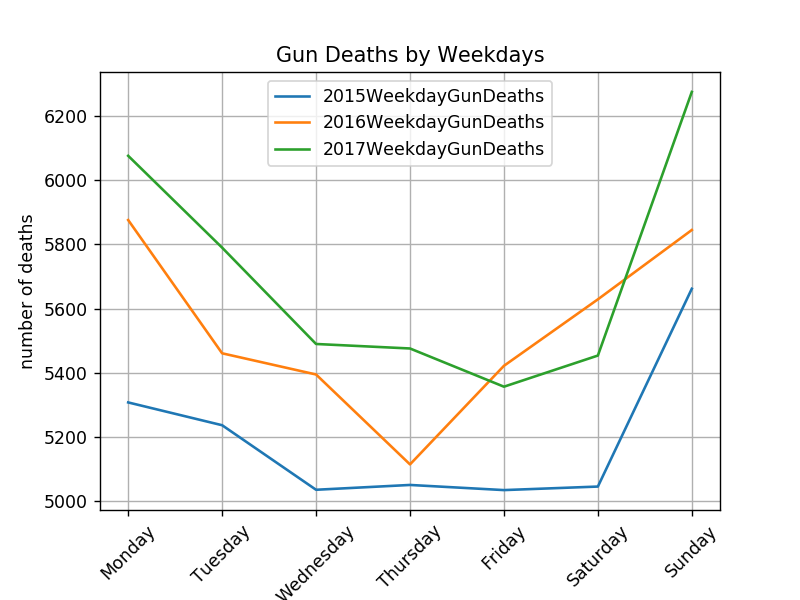

In [10]:
group_data=mort_df.groupby(['Data_Year','DOW_of_Death'])
weekday_death_cnts=group_data['Data_Year'].count()
weekday_death_cnts

fig, ax3 = plt.subplots()

weeks=['Monday','Tuesday','Wednesday','Thursday',  'Friday' ,'Saturday',  'Sunday']
weeks

#creating a list of death counts for each month of the year
weekday_deaths_2015=[weekday_death_cnts[1],weekday_death_cnts[5],weekday_death_cnts[7],weekday_death_cnts[4],weekday_death_cnts[0],weekday_death_cnts[2],weekday_death_cnts[3]]
weekday_deaths_2016=[weekday_death_cnts[9],weekday_death_cnts[13],weekday_death_cnts[15],weekday_death_cnts[12],weekday_death_cnts[8],weekday_death_cnts[10],weekday_death_cnts[11]]
weekday_deaths_2017=[weekday_death_cnts[17],weekday_death_cnts[21],weekday_death_cnts[23],weekday_death_cnts[20],weekday_death_cnts[16],weekday_death_cnts[18],weekday_death_cnts[19]]

#plotting line for each year
line1,=plt.plot(weeks,weekday_deaths_2015,label='2015WeekdayGunDeaths')
line2,=plt.plot(weeks,weekday_deaths_2016,label='2016WeekdayGunDeaths')
line3,=plt.plot(weeks,weekday_deaths_2017,label='2017WeekdayGunDeaths')
ax3.set_title('Gun Deaths by Weekdays')
plt.ylabel('number of deaths')
plt.xticks(weeks,rotation=45)
plt.subplots_adjust(bottom=0.15)
plt.grid()
plt.legend()
plt.show()

plt.savefig('Bhumika_plot_images/Gun_Deaths_by_Weekdays.png')
#The plot show increase in gun deaths on Sunday and Thursday and Friday has the least deaths among all weekdays.